In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import seaborn as sns
from matplotlib.colors import LogNorm
import astropy.constants as const

G = const.G.cgs.value
Omega = 2.528700e-13
t = 36000.*3600*24*365
mh = const.m_p.cgs.value+const.m_e.cgs.value
cs = 0.38e5

sns.set_style("ticks")

In [22]:
filename = '/Users/yaolun/programs/misc/TSC/rho_v_env'
data = ascii.read(filename)
print data.colnames

['lp', 'xr', 'theta', 'ro', 'ur', 'utheta', 'uphi']


In [61]:
nxr = len(np.unique(data['xr']))
ntheta = len(np.unique(data['theta']))
rho2d = data['ro'].reshape([nxr, ntheta])
rho2d = 1/(4*np.pi*G*t**2)*rho2d / mh
print np.shape(rho2d), np.log10(rho2d.min()), np.log10(rho2d.max())

(750, 100) 5.71175968588 9.98332176587


In [58]:
rho2d_exp = np.hstack((rho2d,rho2d,rho2d[:,0:1]))
theta_exp = np.hstack((np.unique(data['theta'])-np.pi/2, np.unique(data['theta'])+np.pi/2, np.unique(data['theta'])[0]-np.pi/2))

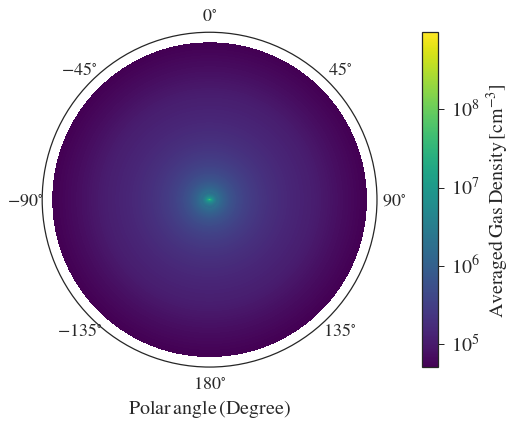

In [92]:
fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111,projection='polar')

img = ax.pcolormesh(theta_exp, np.unique(data['xr']), rho2d_exp, cmap=plt.cm.viridis,
              norm=LogNorm(vmin=rho2d.min(),vmax=rho2d.max()))
ax.set_xticklabels([r'$\rm{90^{\circ}}$',r'$\rm{45^{\circ}}$',r'$\rm{0^{\circ}}$',r'$\rm{-45^{\circ}}$',\
                    r'$\rm{-90^{\circ}}$',r'$\rm{-135^{\circ}}$',r'$\rm{180^{\circ}}$',r'$\rm{135^{\circ}}$'])
ax.set_xlabel(r'$\rm{Polar\,angle\,(Degree)}$',fontsize=20)
ax.set_yticks([])
ax.tick_params(labelsize=18)
cb = fig.colorbar(img, pad=0.1)
cb.ax.set_ylabel(r'$\rm{Averaged\,Gas\,Density\,[cm^{-3}]}$',fontsize=20)

# lower density ticks
cb.set_ticks([1e5,1e6,1e7,1e8,1e9])
cb.set_ticklabels([r'$\rm{10^{5}}$',r'$\rm{10^{6}}$',r'$\rm{10^{7}}$',r'$\rm{10^{8}}$',r'$\rm{\geq 10^{9}}$'])

cb_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cb_obj,fontsize=20)

fig.savefig('/Users/yaolun/test/tsc_density.png', format='png', dpi=300, bbox_inches='tight')

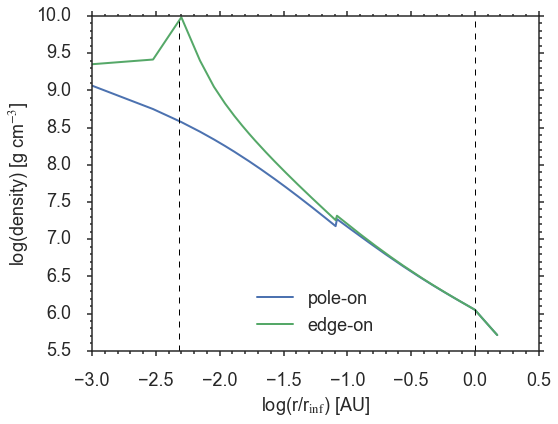

In [93]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

pole, = ax.plot(np.log10(np.unique(data['xr'])), np.log10(rho2d[:,0]), linewidth=2)
mid, = ax.plot(np.log10(np.unique(data['xr'])), np.log10(rho2d[:,49]), linewidth=2)

ax.axvline(np.log10(1), color='k', linestyle='--', linewidth=1)
ax.axvline(np.log10(4.77e-3), color='k', linestyle='--', linewidth=1)

ax.legend([pole, mid], ['pole-on', 'edge-on'], fontsize=18, loc='best')
ax.set_xlabel('log(r/r$_{inf}$) [AU]', fontsize=18)
ax.set_ylabel('log(density) [g cm$^{-3}$]', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)
fig.savefig('/Users/yaolun/test/tsc_density_radial.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Velocities

In [76]:
vr2d = data['ur'].reshape([nxr, ntheta]) * cs/1e5
vr2d_exp = np.hstack((vr2d,vr2d,vr2d[:,0:1]))

vtheta2d = data['utheta'].reshape([nxr, ntheta]) * cs/1e5
vtheta2d_exp = np.hstack((vtheta2d,vtheta2d,vtheta2d[:,0:1]))

vphi2d = data['uphi'].reshape([nxr, ntheta]) * cs/1e5
vphi2d_exp = np.hstack((vphi2d,vphi2d,vphi2d[:,0:1]))

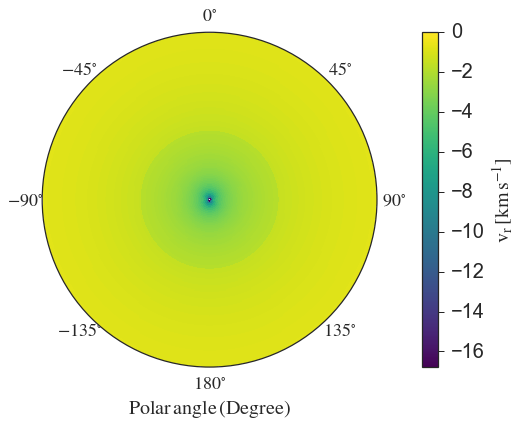

In [94]:
fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111,projection='polar')

img = ax.pcolormesh(theta_exp, np.unique(data['xr'])[np.unique(data['xr']) <= 0.2], vr2d_exp[np.unique(data['xr']) <= 0.2], cmap=plt.cm.viridis,
              vmin=vr2d_exp.min(),vmax=vr2d_exp.max())
ax.set_xticklabels([r'$\rm{90^{\circ}}$',r'$\rm{45^{\circ}}$',r'$\rm{0^{\circ}}$',r'$\rm{-45^{\circ}}$',\
                    r'$\rm{-90^{\circ}}$',r'$\rm{-135^{\circ}}$',r'$\rm{180^{\circ}}$',r'$\rm{135^{\circ}}$'])
ax.set_xlabel(r'$\rm{Polar\,angle\,(Degree)}$',fontsize=20)
ax.set_yticks([])
ax.tick_params(labelsize=18)
cb = fig.colorbar(img, pad=0.1)
cb.ax.set_ylabel(r'$\rm{v_{r}\,[km\,s^{-1}]}$',fontsize=20)

# # lower density ticks
# cb.set_ticks([1e5,1e6,1e7,1e8,1e9])
# cb.set_ticklabels([r'$\rm{10^{5}}$',r'$\rm{10^{6}}$',r'$\rm{10^{7}}$',r'$\rm{10^{8}}$',r'$\rm{\geq 10^{9}}$'])

cb_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cb_obj,fontsize=20)
fig.savefig('/Users/yaolun/test/tsc_vr.png', format='png', dpi=300, bbox_inches='tight')

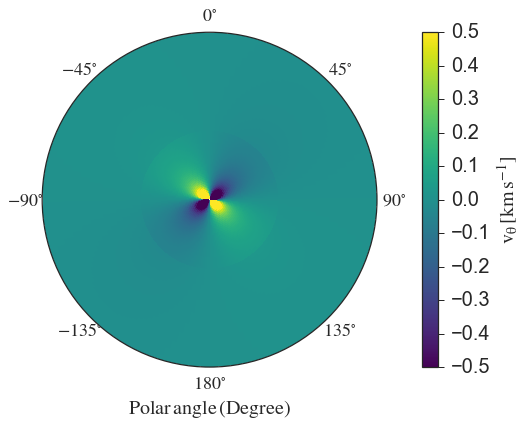

In [95]:
fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111,projection='polar')

img = ax.pcolormesh(theta_exp, np.unique(data['xr'])[np.unique(data['xr']) <= 0.2], 
                    vtheta2d_exp[np.unique(data['xr']) <= 0.2], cmap=plt.cm.viridis,
                    vmin=-0.5,vmax=0.5)
ax.set_xticklabels([r'$\rm{90^{\circ}}$',r'$\rm{45^{\circ}}$',r'$\rm{0^{\circ}}$',r'$\rm{-45^{\circ}}$',\
                    r'$\rm{-90^{\circ}}$',r'$\rm{-135^{\circ}}$',r'$\rm{180^{\circ}}$',r'$\rm{135^{\circ}}$'])
ax.set_xlabel(r'$\rm{Polar\,angle\,(Degree)}$',fontsize=20)
ax.set_yticks([])
ax.tick_params(labelsize=18)
cb = fig.colorbar(img, pad=0.1)
cb.ax.set_ylabel(r'$\rm{v_{\theta}\,[km\,s^{-1}]}$',fontsize=20)

# # lower density ticks
# cb.set_ticks([1e5,1e6,1e7,1e8,1e9])
# cb.set_ticklabels([r'$\rm{10^{5}}$',r'$\rm{10^{6}}$',r'$\rm{10^{7}}$',r'$\rm{10^{8}}$',r'$\rm{\geq 10^{9}}$'])

cb_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cb_obj,fontsize=20)
fig.savefig('/Users/yaolun/test/tsc_vtheta.png', format='png', dpi=300, bbox_inches='tight')

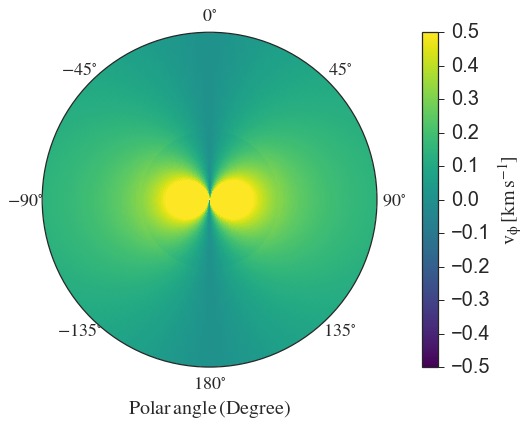

In [96]:
fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111,projection='polar')

img = ax.pcolormesh(theta_exp, np.unique(data['xr'])[np.unique(data['xr']) <= 0.2], 
                    vphi2d_exp[np.unique(data['xr']) <= 0.2], cmap=plt.cm.viridis,
                    vmin=-0.5,vmax=0.5)
ax.set_xticklabels([r'$\rm{90^{\circ}}$',r'$\rm{45^{\circ}}$',r'$\rm{0^{\circ}}$',r'$\rm{-45^{\circ}}$',\
                    r'$\rm{-90^{\circ}}$',r'$\rm{-135^{\circ}}$',r'$\rm{180^{\circ}}$',r'$\rm{135^{\circ}}$'])
ax.set_xlabel(r'$\rm{Polar\,angle\,(Degree)}$',fontsize=20)
ax.set_yticks([])
ax.tick_params(labelsize=18)
cb = fig.colorbar(img, pad=0.1)
cb.ax.set_ylabel(r'$\rm{v_{\phi}\,[km\,s^{-1}]}$',fontsize=20)

# # lower density ticks
# cb.set_ticks([1e5,1e6,1e7,1e8,1e9])
# cb.set_ticklabels([r'$\rm{10^{5}}$',r'$\rm{10^{6}}$',r'$\rm{10^{7}}$',r'$\rm{10^{8}}$',r'$\rm{\geq 10^{9}}$'])

cb_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cb_obj,fontsize=20)
fig.savefig('/Users/yaolun/test/tsc_vphi.png', format='png', dpi=300, bbox_inches='tight')